 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [2]:
# Reading whale returns
whale_returns = pd.read_csv('Resources/whale_returns.csv', index_col='Date', parse_dates=True).dropna()

In [3]:
# Count nulls
whale_returns.isnull().mean() * 100

SOROS FUND MANAGEMENT LLC      0.0
PAULSON & CO.INC.              0.0
TIGER GLOBAL MANAGEMENT LLC    0.0
BERKSHIRE HATHAWAY INC         0.0
dtype: float64

In [4]:
# Drop nulls


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [5]:
# Reading algorithmic returns
algo_returns = pd.read_csv('Resources/algo_returns.csv', index_col='Date', parse_dates=True).dropna()

In [6]:
# Count nulls
algo_returns.isnull().mean() * 100

Algo 1    0.0
Algo 2    0.0
dtype: float64

In [7]:
# Drop nulls


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P TSX 60 Closing Prices
sp_tsx_history = pd.read_csv('Resources/sp_tsx_history.csv', index_col='Date', parse_dates=True).dropna()

In [9]:
# Check Data Types
sp_tsx_history.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
sp_tsx_history['Close'] = sp_tsx_history['Close'].str.replace('$', '', regex=False).str.replace(',', '', regex=False).astype(float)

In [11]:
# Calculate Daily Returns
sp_tsx_history['S&P TSX'] = sp_tsx_history['Close'].pct_change()

In [12]:
# Count nulls
sp_tsx_history.isnull().mean() * 100

Close      0.000000
S&P TSX    0.055006
dtype: float64

In [13]:
# Rename `Close` Column to be specific to this portfolio.


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [14]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
from functools import reduce
df_merged = reduce(lambda left,right: pd.merge(left,right,left_index=True, right_index=True, how='outer'), [whale_returns, algo_returns, sp_tsx_history])
df = df_merged.drop(columns=['Close']).dropna()
df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

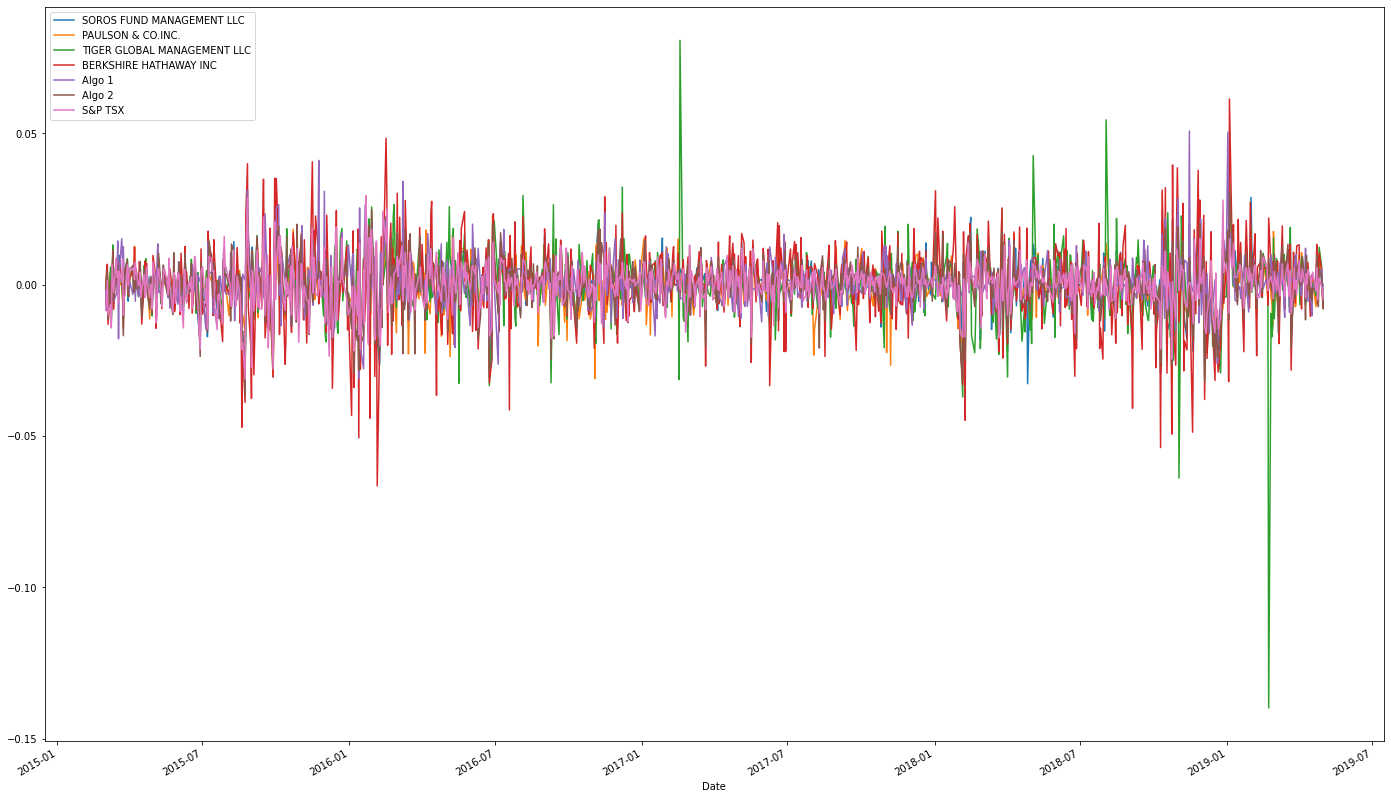

In [15]:
# Plot daily returns of all portfolioss
df.plot(figsize=[24,15])

#### Calculate and Plot cumulative returns.

SOROS FUND MANAGEMENT LLC      1.120637
PAULSON & CO.INC.              0.761096
TIGER GLOBAL MANAGEMENT LLC    0.848958
BERKSHIRE HATHAWAY INC         1.354361
Algo 1                         2.021865
Algo 2                         1.195327
S&P TSX                        1.065767
Name: 2019-05-01 00:00:00, dtype: float64

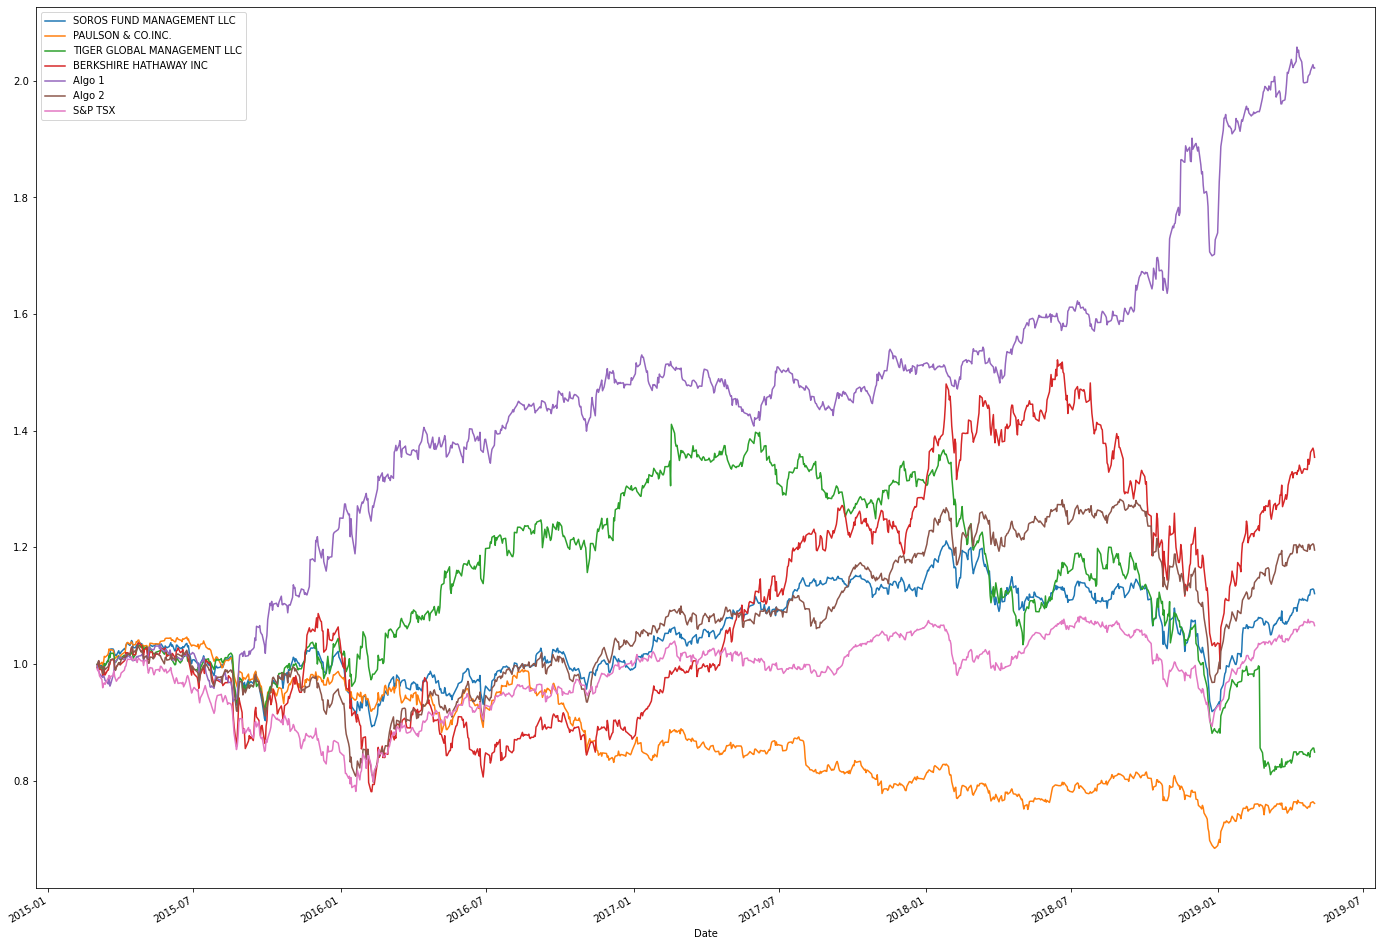

In [16]:
# Calculate cumulative returns of all portfolios
df_cumprod = (df + 1).cumprod()
# Plot cumulative returns
df_cumprod.plot(figsize=(24,18))
df_cumprod.iloc[-1,:]

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:>

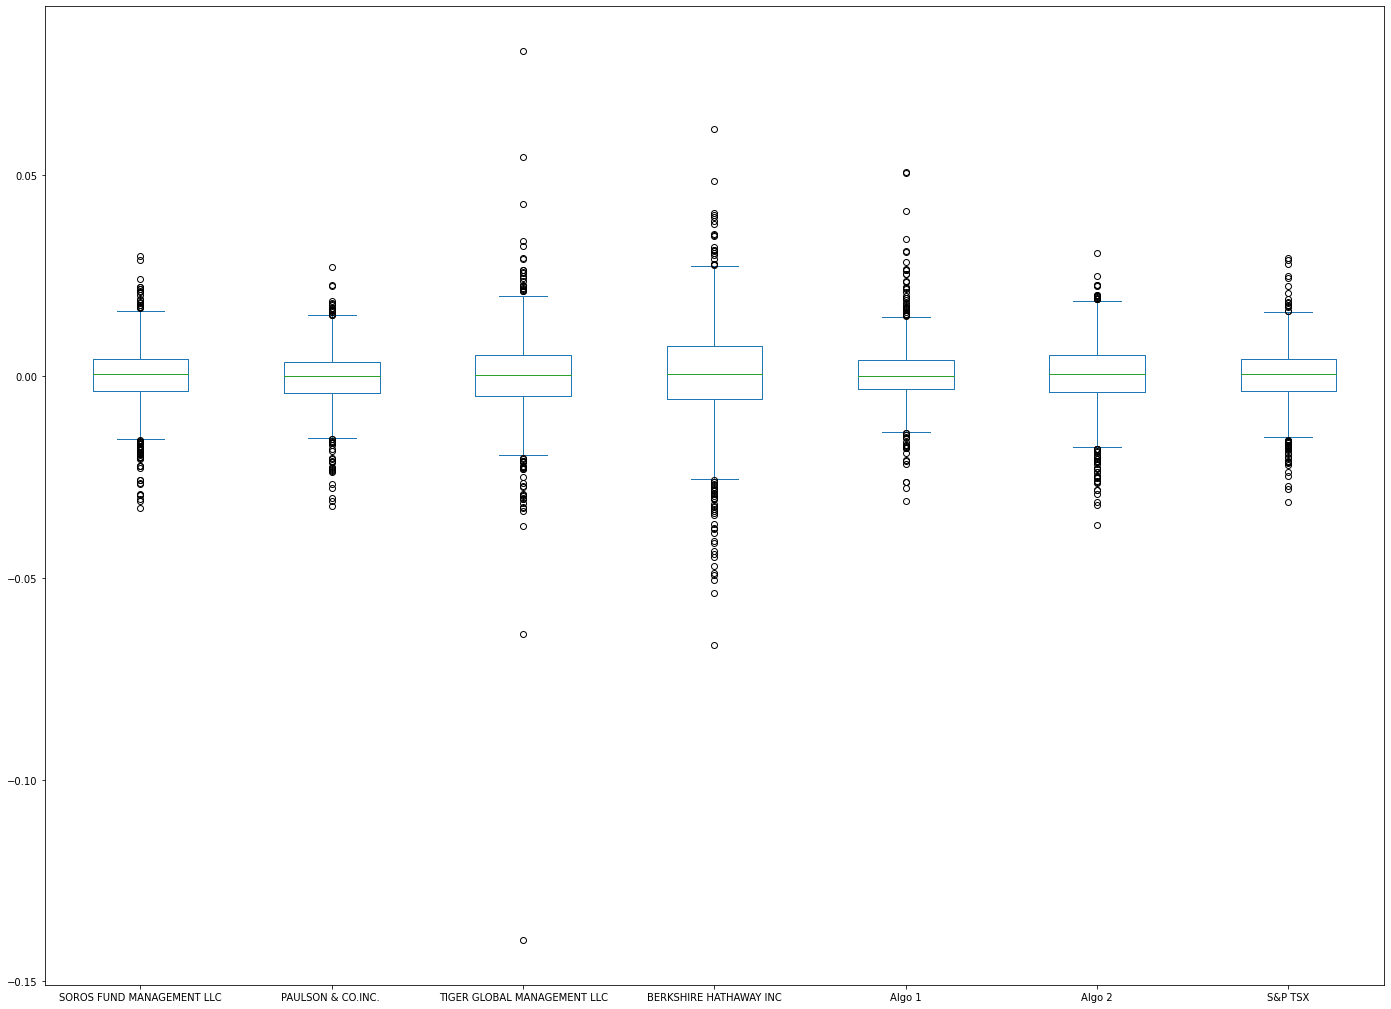

In [17]:
# Box plot to visually show risk
df.plot.box(figsize=(24,18))

### Calculate Standard Deviations

In [18]:
# Calculate the daily standard deviations of all portfolios
df_std_dev = df.std()

### Determine which portfolios are riskier than the S&P TSX 60

In [19]:
# Calculate  the daily standard deviation of S&P TSX 60
print(f"Daily standard deviation of S&P TSX: {df_std_dev['S&P TSX']}")
# Determine which portfolios are riskier than the S&P TSX 60
print(f"Portfolios riskier than the S&P TSX:")
df_std_dev[df_std_dev > df_std_dev['S&P TSX']]

# All portfolios are riskier than S&P TSX, except PAULSON & CO.INC.

Daily standard deviation of S&P TSX: 0.007034167748577719
Portfolios riskier than the S&P TSX:


SOROS FUND MANAGEMENT LLC      0.007828
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
dtype: float64

### Calculate the Annualized Standard Deviation

In [20]:
# Calculate the annualized standard deviation (252 trading days)
annualised_std = df_std_dev * np.sqrt(252)
annualised_std

SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
Algo 1                         0.120470
Algo 2                         0.132177
S&P TSX                        0.111664
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

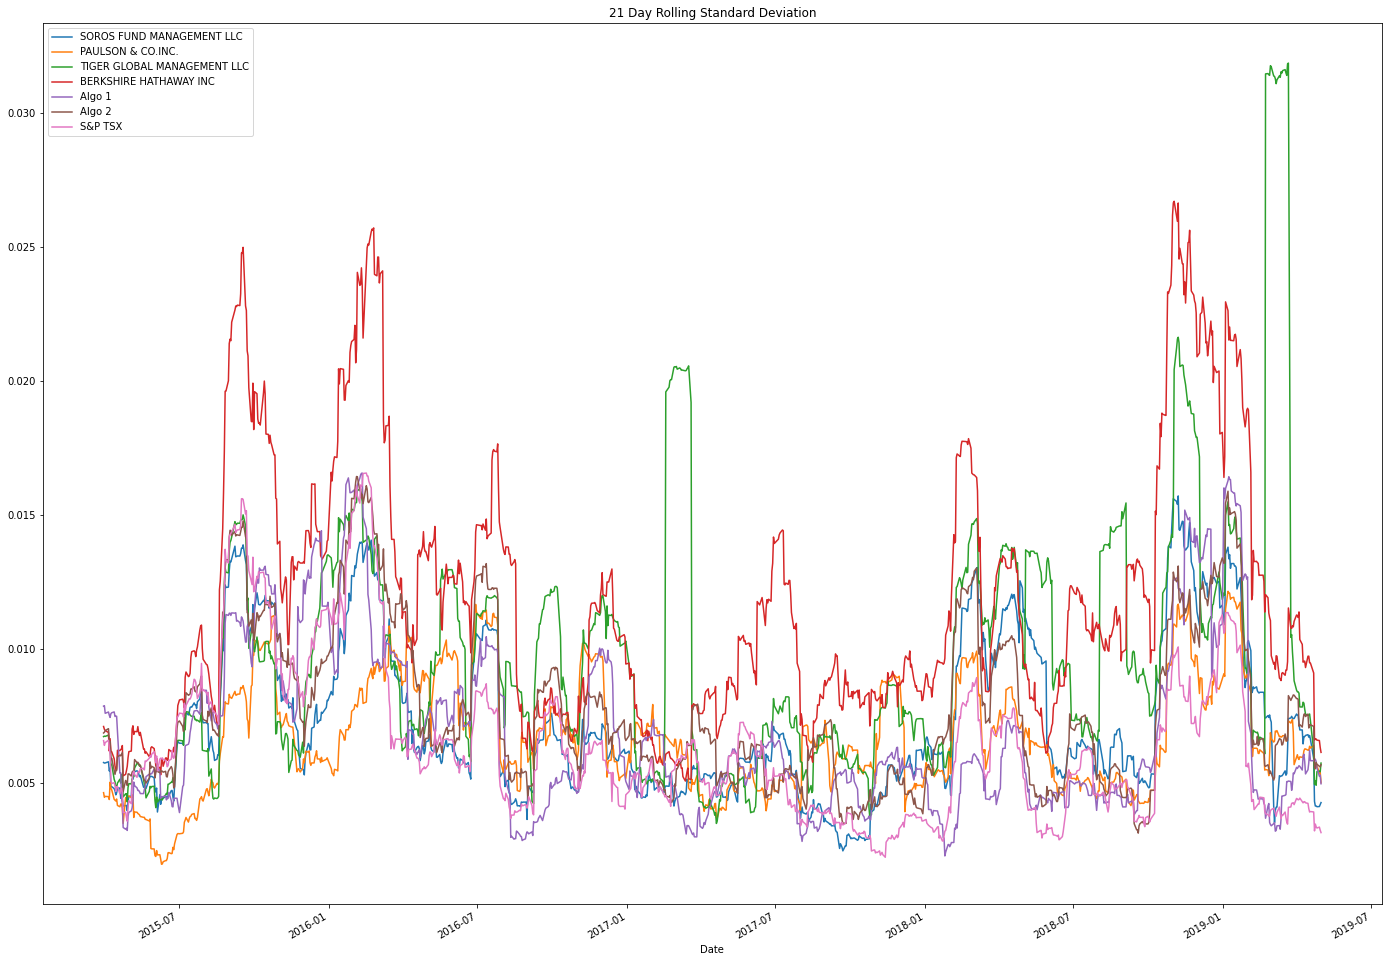

In [21]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
df.rolling(window=21).std().plot(figsize=(24,18), title='21 Day Rolling Standard Deviation');
# Plot the rolling standard deviation


### Calculate and plot the correlation

<AxesSubplot:>

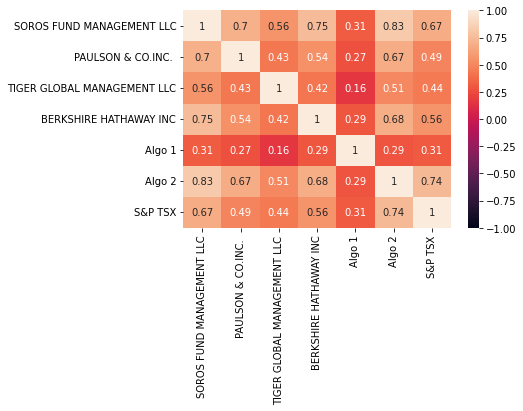

In [22]:
# Calculate the correlation
import seaborn as sns
correlation = df.corr()
# Display de correlation matrix
sns.heatmap(correlation, vmin=-1, vmax=1, annot=True)

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

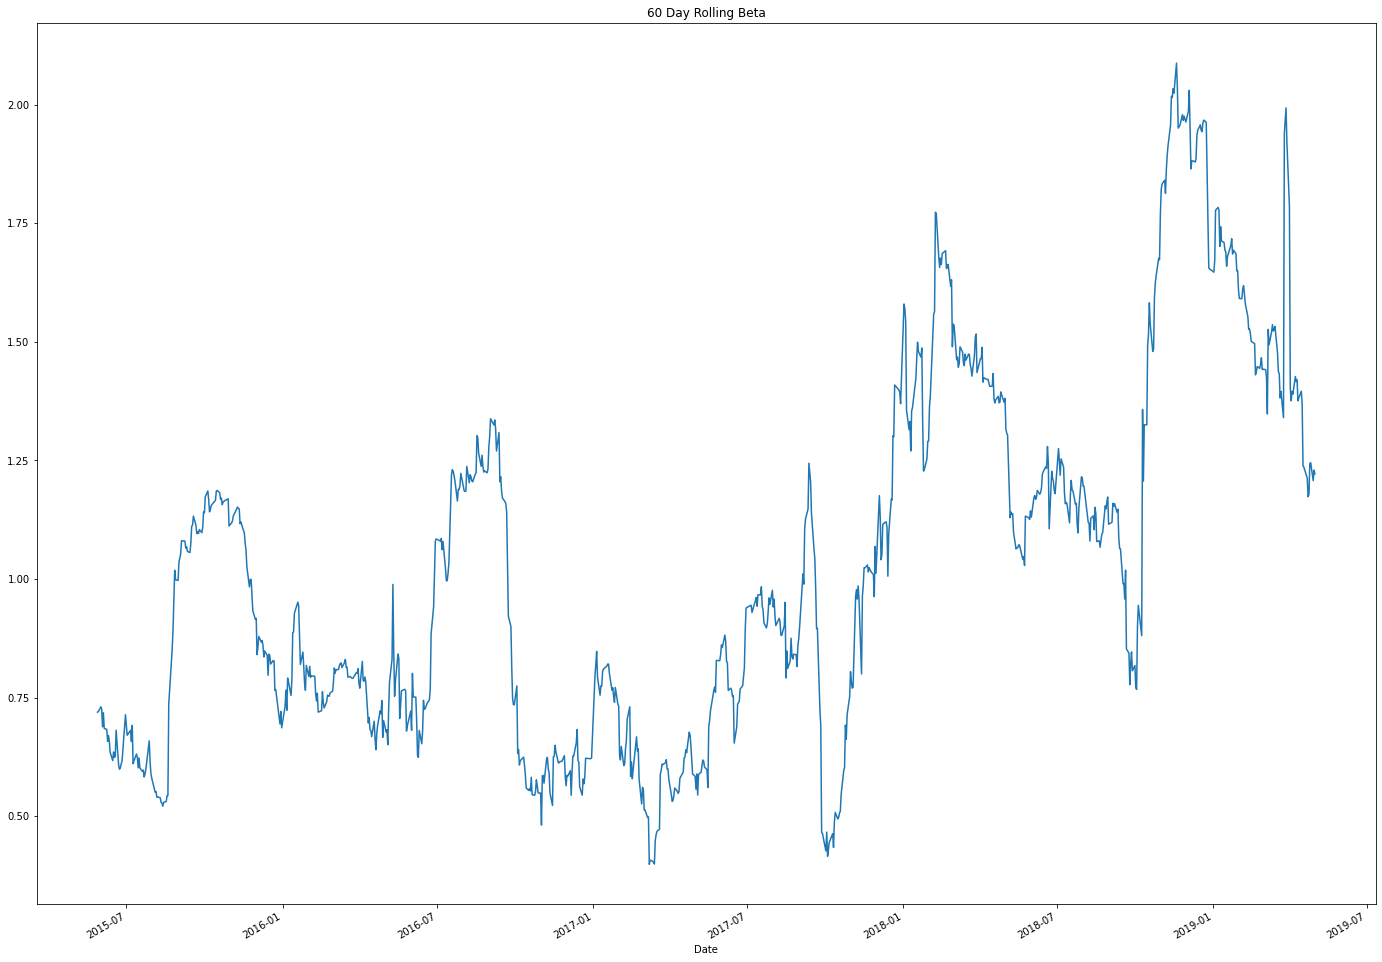

In [23]:
# Calculate covariance of a single portfolio
# covariance = df['Algo 1'].cov(df['S&P TSX'])
rolling_covariance = df['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(df['S&P TSX'])

# Calculate variance of S&P TSX
rolling_variance = df['S&P TSX'].rolling(window=60).var()
# Computing beta
rolling_beta = rolling_covariance / rolling_variance

# Plot beta trend
rolling_beta.plot(figsize=(24,18), title='60 Day Rolling Beta');

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

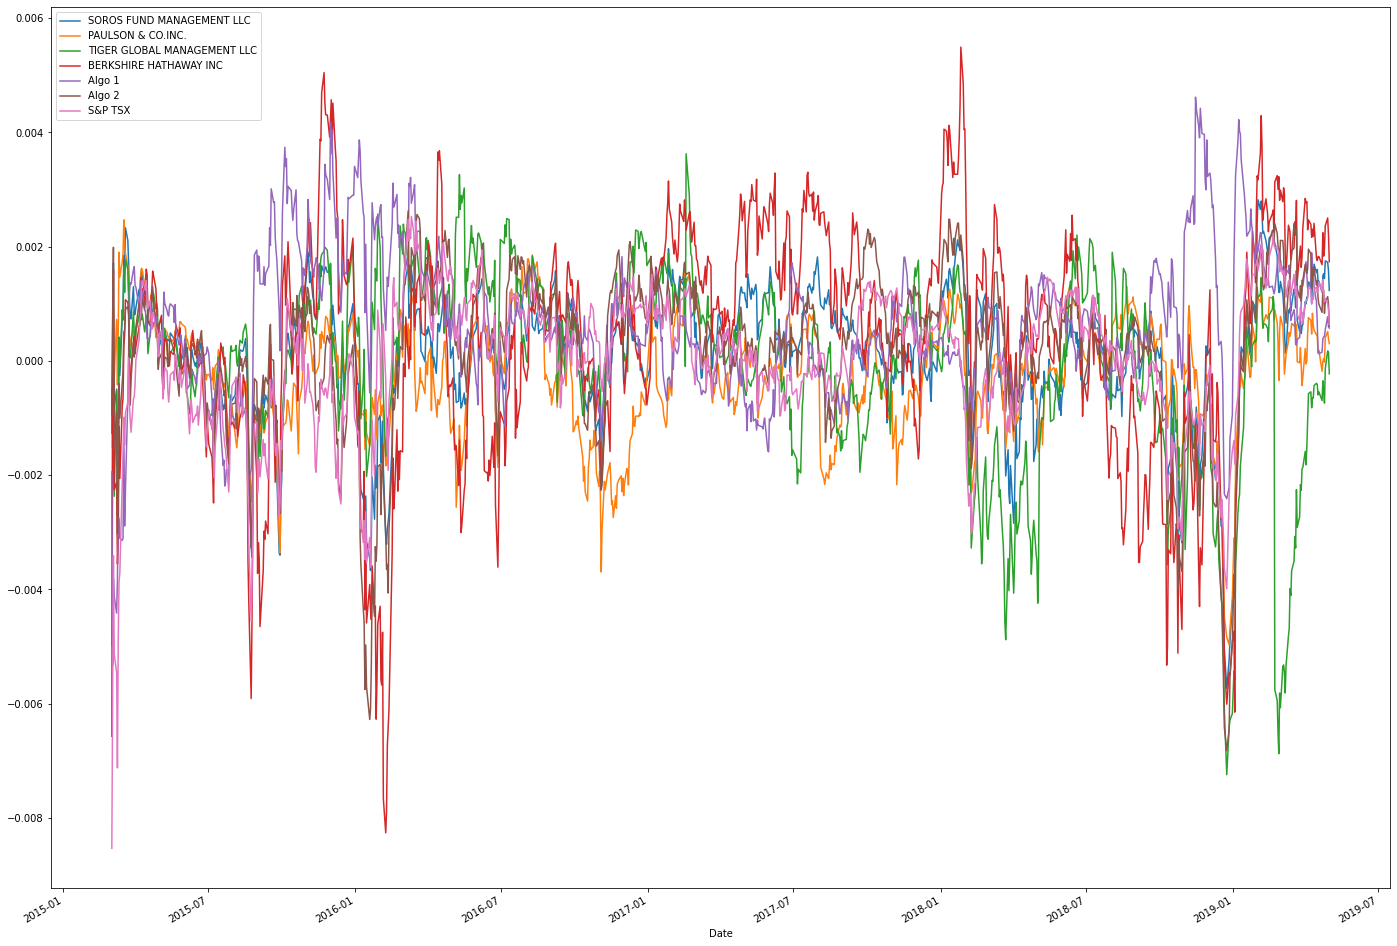

In [24]:
# Use `ewm` to calculate the rolling window
# rolling_ewm = df['S&P TSX'].rolling(window=21).ewm()
ewma_21 = df.ewm(halflife='21 days', times=df.index).mean().plot(figsize=(24,18))


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [25]:
# Annualized Sharpe Ratios
sharpe_ratios = (df.mean() * 252) / (df.std() * np.sqrt(252))

[Text(0, 0, '0.286709'),
 Text(0, 0, '-0.547594'),
 Text(0, 0, '-0.144455'),
 Text(0, 0, '0.467045'),
 Text(0, 0, '1.49151'),
 Text(0, 0, '0.396817'),
 Text(0, 0, '0.19555')]

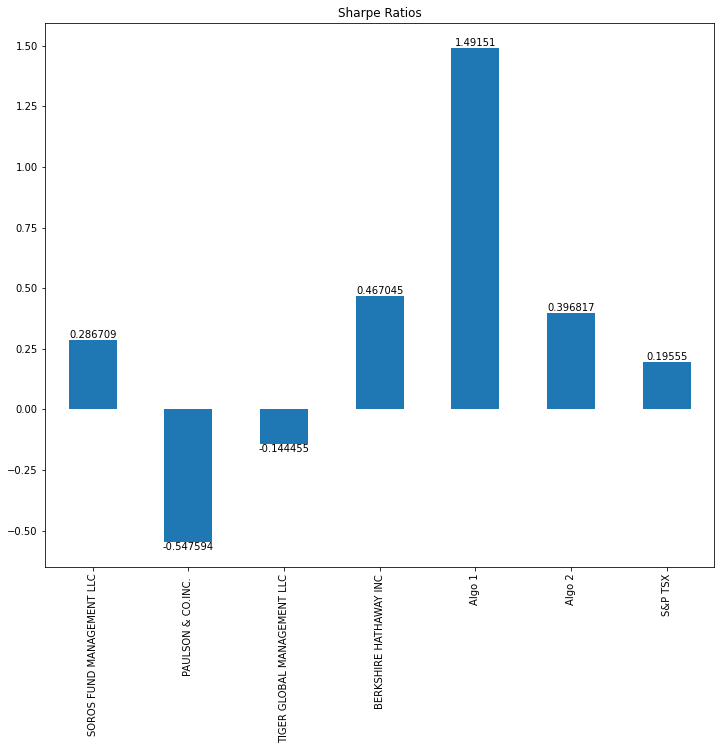

In [26]:
# Visualize the sharpe ratios as a bar plot
ax = sharpe_ratios.plot.bar(title='Sharpe Ratios', figsize=(12,10));
ax.bar_label(ax.containers[0])

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

- Both Algo 1 and Algo 2 outperform the market (S&P TSX 60).
- Algo 1 outperforms all the whales portfolios.
- Algo 2 also outperforms all whale portfolios except Berkshire Hathaway Inc. 

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [27]:
# Reading data from 1st stock
aapl_history = pd.read_csv('Resources/aapl_historical.csv', index_col='Date', parse_dates=True).dropna()
aapl_history.columns = ['AAPL']

In [28]:
# Reading data from 2nd stock
goog_history = pd.read_csv('Resources/goog_historical.csv', index_col='Date', parse_dates=True).dropna()
goog_history.columns = ['GOOG']

In [29]:
# Reading data from 3rd stock
msft_history = pd.read_csv('Resources/msft_historical.csv', index_col='Date', parse_dates=True).dropna()
msft_history.columns = ['MSFT']

In [30]:
# Reading data from 4th stock
tsla_history = pd.read_csv('Resources/tsla_historical.csv', index_col='Date', parse_dates=True).dropna()
tsla_history.columns = ['TSLA']

In [31]:
# Combine all stocks in a single DataFrame
df_historical = pd.concat([aapl_history, goog_history, msft_history, tsla_history], axis='columns', join='inner')
df_historical.head()

,AAPL,GOOG,MSFT,TSLA
Date,,,,
2015-03-02,32.27,569.78,43.88,39.47
2015-03-03,32.34,572.07,43.28,39.91
2015-03-04,32.14,571.80,43.06,40.49
2015-03-05,31.60,573.75,43.11,40.13
2015-03-06,31.65,566.13,42.36,38.78


In [32]:
# Sort Date index
df_historical.sort_index(inplace=True)
df_historical.head()


,AAPL,GOOG,MSFT,TSLA
Date,,,,
2015-03-02,32.27,569.78,43.88,39.47
2015-03-03,32.34,572.07,43.28,39.91
2015-03-04,32.14,571.80,43.06,40.49
2015-03-05,31.60,573.75,43.11,40.13
2015-03-06,31.65,566.13,42.36,38.78


In [33]:
# Reorganize portfolio data by having a column per symbol


In [34]:
# Calculate daily returns
daily_returns = df_historical.pct_change()
# Drop NAs
daily_returns.dropna(inplace=True)
# Display sample data
daily_returns.head()

,AAPL,GOOG,MSFT,TSLA
Date,,,,
2015-03-03,0.002169,0.004019,-0.013674,0.011148
2015-03-04,-0.006184,-0.000472,-0.005083,0.014533
2015-03-05,-0.016801,0.003410,0.001161,-0.008891
2015-03-06,0.001582,-0.013281,-0.017397,-0.033641
2015-03-09,0.004423,0.002049,0.011568,-0.015472


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [35]:
# Set weights
weights = [1/4, 1/4, 1/4, 1/4]

# Calculate portfolio return
# df_returns = daily_returns.copy()
# df_returns['Total Portfolio'] = daily_returns.dot(weights)
# df_returns.head()
portfolio_returns = daily_returns.dot(weights)
portfolio_returns.head()

Date
2015-03-03    0.000916
2015-03-04    0.000698
2015-03-05   -0.005280
2015-03-06   -0.015684
2015-03-09    0.000642
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [36]:
# Join your returns DataFrame to the original returns DataFrame
df_returns = pd.concat([df, portfolio_returns], axis='columns', join='inner')
new_column_headers = list(df_returns.columns[:-1])
new_column_headers.append('Custom')
df_returns.columns = new_column_headers
df_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX,Custom
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530,0.000916
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371,0.000698
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344,-0.005280
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972,-0.015684
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555,0.000642


In [37]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
print(df_returns.isnull().sum())
df_returns.dropna()
print(df_returns.isnull().sum())

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
S&P TSX                        0
Custom                         0
dtype: int64
SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
S&P TSX                        0
Custom                         0
dtype: int64


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [38]:
# Calculate the annualized standard deviation (252 trading days)
annualised_std = df_returns.std() * np.sqrt(252)
annualised_std

SOROS FUND MANAGEMENT LLC      0.124154
PAULSON & CO.INC.              0.110959
TIGER GLOBAL MANAGEMENT LLC    0.172522
BERKSHIRE HATHAWAY INC         0.203706
Algo 1                         0.120706
Algo 2                         0.132204
S&P TSX                        0.111734
Custom                         0.216863
dtype: float64

### Calculate and plot rolling `std` with 21-day window

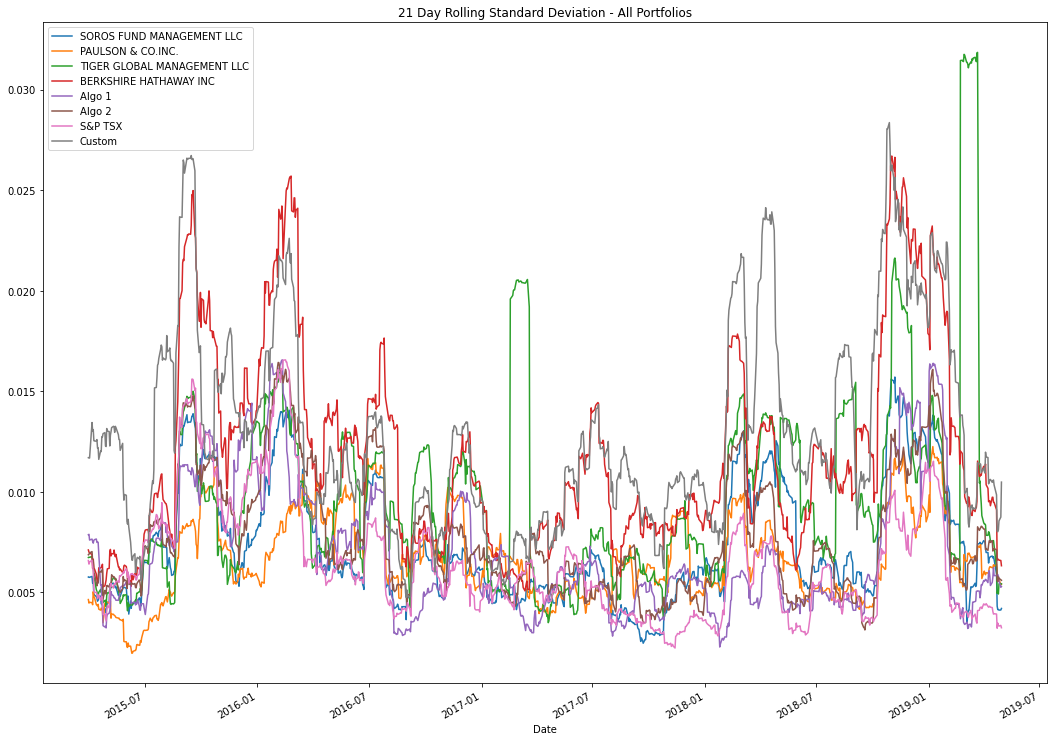

In [39]:
# Calculate rolling standard deviation
df_returns.rolling(window=21).std().plot(title='21 Day Rolling Standard Deviation - All Portfolios', figsize=(18,13.5));
# Plot rolling standard deviation


### Calculate and plot the correlation

<AxesSubplot:>

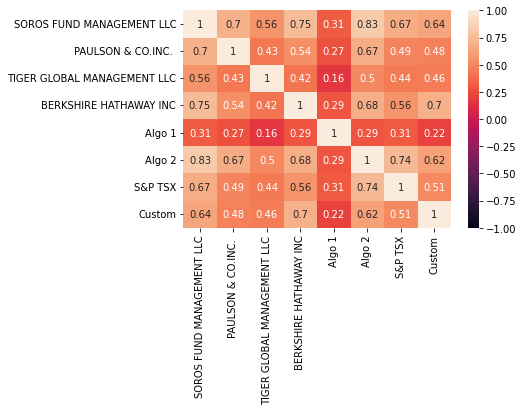

In [40]:
# Calculate and plot the correlation
correlation = df_returns.corr()
# Display de correlation matrix
sns.heatmap(correlation, vmin=-1, vmax=1, annot=True)

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

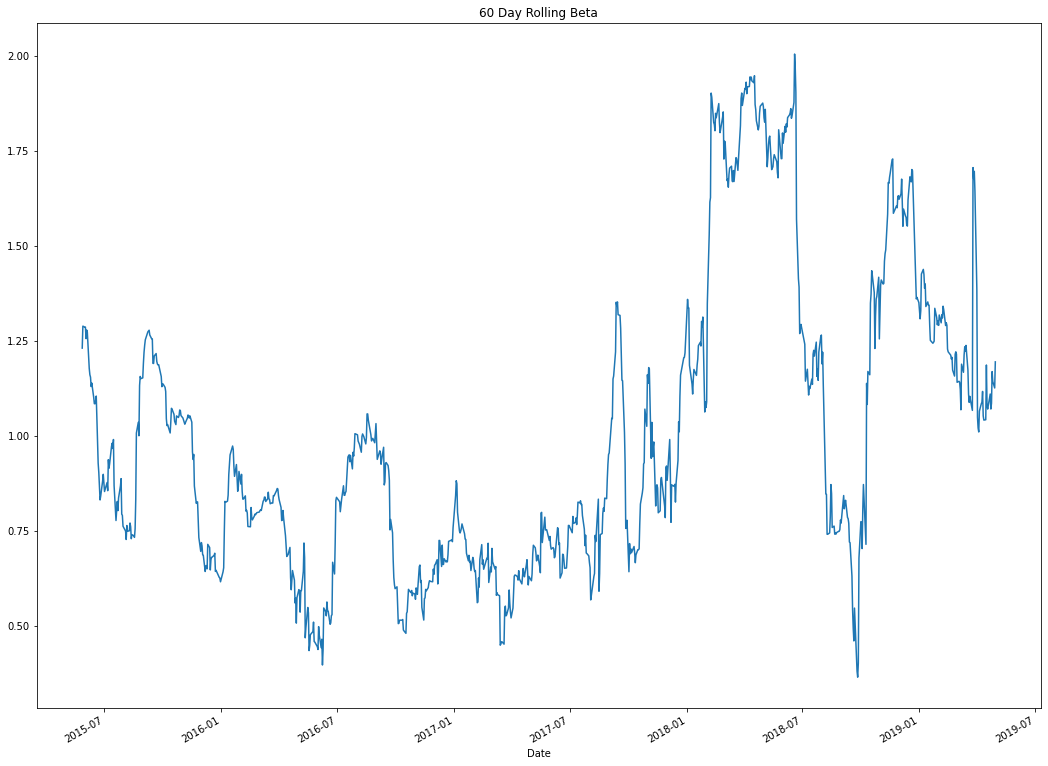

In [41]:
# Calculate and plot Beta
df_returns.rolling(window=60)
rolling_covariance = df_returns['Custom'].rolling(window=60).cov(df_returns['S&P TSX'])

# Calculate variance of S&P TSX
rolling_variance = df_returns['S&P TSX'].rolling(window=60).var()
# Computing beta
rolling_beta = rolling_covariance / rolling_variance

# Plot beta trend
rolling_beta.plot(figsize=(18, 14), title='60 Day Rolling Beta');

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [42]:
# Calculate Annualized Sharpe Ratios
sharpe_ratios_all = (df_returns.mean() * 252) / (df_returns.std() * np.sqrt(252))

[Text(0, 0, '0.333734'),
 Text(0, 0, '-0.514813'),
 Text(0, 0, '-0.0969811'),
 Text(0, 0, '0.522459'),
 Text(0, 0, '1.5149'),
 Text(0, 0, '0.421562'),
 Text(0, 0, '0.240419'),
 Text(0, 0, '0.939778')]

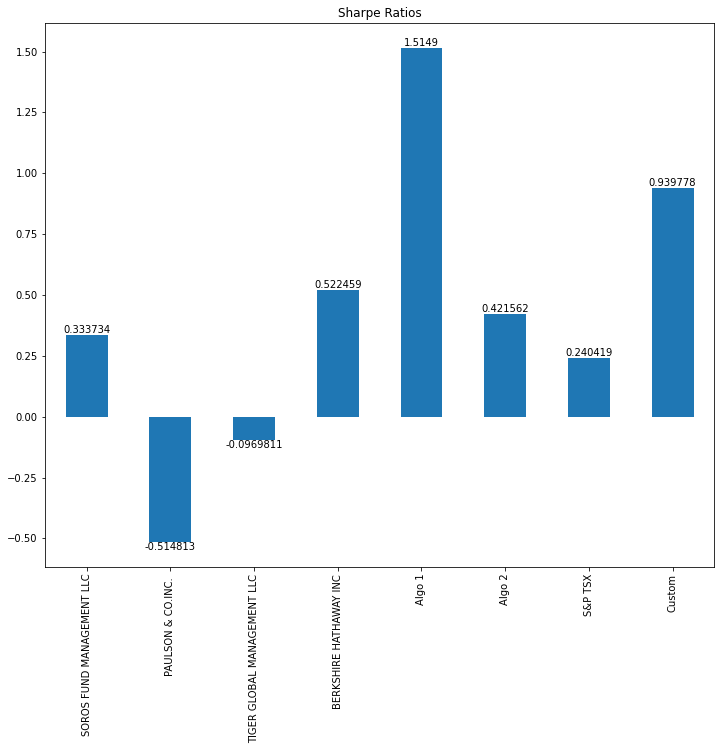

In [43]:
# Visualize the sharpe ratios as a bar plot
ax_1 = sharpe_ratios_all.plot.bar(title='Sharpe Ratios', figsize=(12,10));
ax_1.bar_label(ax_1.containers[0])

### How does your portfolio do?

Write your answer here!

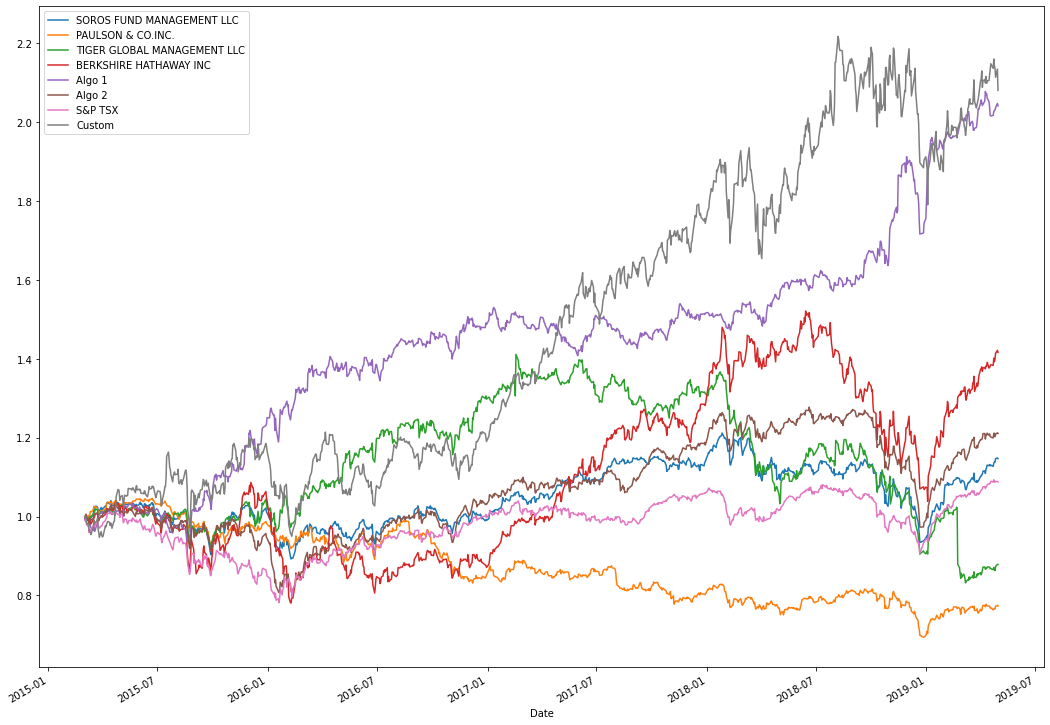

In [44]:
# Calculate cumulative returns
df_returns_cumprod = (df_returns + 1).cumprod()

# Plot the cumulative returns
df_returns_cumprod.plot(figsize=(18, 13.5));

The custom portfolio's sharpe ratio outperforms the market (S&P TSX) and all other portfolios except Algo 1. That is, it has better returns given its level of volatility. However, the custom portfolio's ending return is better than the market and all other portfolios, including Algo 1.